In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mord import LogisticIT
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import neighbors 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

from math import sqrt
from dmba import regressionSummary

from dmba import classificationSummary, liftChart
from dmba import regressionSummary
from dmba import backward_elimination
from dmba import AIC_score, BIC_score


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates


%matplotlib inline   
import matplotlib.pylab as plt

no display found. Using non-interactive Agg backend


In [2]:
#Reading the csv file
fraud_df = pd.read_csv("/Users/temp/Downloads/Fraudulent_E-Commerce_Transaction_Data_2.csv")

In [3]:
fraud_df.head(5)

Transaction ID                           Customer ID  \
0  c12e07a0-8a06-4c0d-b5cc-04f3af688570  8ca9f102-02a4-4207-ab63-484e83a1bdf0   
1  7d187603-7961-4fce-9827-9698e2b6a201  4d158416-caae-4b09-bd5b-15235deb9129   
2  f2c14f9d-92df-4aaf-8931-ceaf4e63ed72  ccae47b8-75c7-4f5a-aa9e-957deced2137   
3  e9949bfa-194d-486b-84da-9565fca9e5ce  b04960c0-aeee-4907-b1cd-4819016adcef   
4  7362837c-7538-434e-8731-0df713f5f26d  de9d6351-b3a7-4bc7-9a55-8f013eb66928   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               42.32  2024-03-24 23:42:43         PayPal      electronics   
1              301.34  2024-01-22 00:53:31    credit card      electronics   
2              340.32  2024-01-22 08:06:03     debit card     toys & games   
3               95.77  2024-01-16 20:34:53    credit card      electronics   
4               77.45  2024-01-16 15:47:23    credit card         clothing   

   Quantity  Customer Age    Customer Location Device Used       IP Address  \
0         1            40      East Jameshaven     desktop    110.87.246.85   
1         3            35             Kingstad      tablet    14.73.104.153   
2         5            29           North Ryan     desktop      67.58.94.93   
3         5            45           Kaylaville      mobile  202.122.126.216   
4         5            42  North Edwardborough     desktop     96.77.232.76   

                                    Shipping Address  \
0  5399 Rachel Stravenue Suite 718\nNorth Blakebu...   
1        5230 Stephanie Forge\nCollinsbury, PR 81853   
2                195 Cole Oval\nPort Larry, IA 58422   
3         7609 Cynthia Square\nWest Brenda, NV 23016   
4  2494 Robert Ramp Suite 313\nRobinsonport, AS 5...   

                                     Billing Address  Is Fraudulent  \
0  5399 Rachel Stravenue Suite 718\nNorth Blakebu...              0   
1        5230 Stephanie Forge\nCollinsbury, PR 81853              0   
2  4772 David Stravenue Apt. 447\nVelasquezside, ...              0   
3         7609 Cynthia Square\nWest Brenda, NV 23016              0   
4  2494 Robert Ramp Suite 313\nRobinsonport, AS 5...              0   

   Account Age Days  Transaction Hour  
0               282                23  
1               223                 0  
2               360                 8  
3               325                20  
4               116                15

In [4]:
#shape of the dataframe
fraud_df.shape

(23634, 16)

In [5]:
#types of data present in data frame
fraud_df.dtypes

Transaction ID         object
Customer ID            object
Transaction Amount    float64
Transaction Date       object
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Customer Location      object
Device Used            object
IP Address             object
Shipping Address       object
Billing Address        object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

In [6]:
#droping the unwanted columns
fraud_df.drop(columns=["Transaction ID", "Customer ID","Customer Location",
                     "IP Address","Shipping Address","Billing Address"], inplace=True)

In [7]:
#finding the shape after droping the columns
fraud_df.shape

(23634, 10)

In [8]:
#counting how many legitimate values are present in the data
fraud_df['Is Fraudulent'].value_counts()[0]

22412

In [9]:
#finding how many fraudulent values are present in the data 
fraud_df['Is Fraudulent'].value_counts()[1]

1222

In [10]:
#Checking if null values are present in the data or not
fraud_df.isnull().any()


Transaction Amount    False
Transaction Date      False
Payment Method        False
Product Category      False
Quantity              False
Customer Age          False
Device Used           False
Is Fraudulent         False
Account Age Days      False
Transaction Hour      False
dtype: bool

In [11]:
# Convert the 'Transaction Date' column to datetime format
fraud_df['Transaction Date'] = pd.to_datetime(fraud_df['Transaction Date'])

# Normalize to remove the time component, keeping the datetime type
fraud_df['Transaction Date'] = fraud_df['Transaction Date'].dt.normalize()

# Checking the data type
print(fraud_df['Transaction Date'].dtype)

datetime64[ns]


In [12]:
fraud_df['Transaction Date'] = fraud_df['Transaction Date'].dt.strftime('%m%d%Y').astype(int)


In [13]:
fraud_df.dtypes

Transaction Amount    float64
Transaction Date        int64
Payment Method         object
Product Category       object
Quantity                int64
Customer Age            int64
Device Used            object
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int64
dtype: object

In [14]:
fraud_df.columns = [s.strip().replace(' ', '_') for s in fraud_df.columns]
fraud_df.columns

Index(['Transaction_Amount', 'Transaction_Date', 'Payment_Method',
       'Product_Category', 'Quantity', 'Customer_Age', 'Device_Used',
       'Is_Fraudulent', 'Account_Age_Days', 'Transaction_Hour'],
      dtype='object')

In [15]:
fraud_df.describe()

Transaction_Amount  Transaction_Date      Quantity  Customer_Age  \
count        23634.000000      2.363400e+04  23634.000000  23634.000000   
mean           229.367099      2.281165e+06      3.000550     34.560210   
std            282.046669      9.326853e+05      1.419663     10.009471   
min             10.000000      1.012024e+06      1.000000     -2.000000   
25%             69.070000      1.242024e+06      2.000000     28.000000   
50%            151.415000      2.182024e+06      3.000000     35.000000   
75%            296.127500      3.139524e+06      4.000000     41.000000   
max           9716.500000      4.072024e+06      5.000000     73.000000   

       Is_Fraudulent  Account_Age_Days  Transaction_Hour  
count   23634.000000      23634.000000      23634.000000  
mean        0.051705        178.660531         11.266015  
std         0.221436        107.388682          6.980659  
min         0.000000          1.000000          0.000000  
25%         0.000000         84.000000          5.000000  
50%         0.000000        178.000000         11.000000  
75%         0.000000        272.000000         17.000000  
max         1.000000        365.000000         23.000000

In [16]:
numeric_columns = fraud_df.select_dtypes(include=[np.number])
outliers = fraud_df[(numeric_columns < numeric_columns.min() - 3 * (numeric_columns.max() - numeric_columns.min())) | (numeric_columns > numeric_columns.max() + 3 * (numeric_columns.max() - numeric_columns.min()))].dropna()
outliers

Empty DataFrame
Columns: [Transaction_Amount, Transaction_Date, Payment_Method, Product_Category, Quantity, Customer_Age, Device_Used, Is_Fraudulent, Account_Age_Days, Transaction_Hour]
Index: []

In [17]:
fraud_df = pd.get_dummies(fraud_df, columns=['Payment_Method','Product_Category','Device_Used'], 
                            drop_first=True)

In [18]:
fraud_df.columns = [s.strip().replace(' ', '_') for s in fraud_df.columns]
fraud_df.columns

Index(['Transaction_Amount', 'Transaction_Date', 'Quantity', 'Customer_Age',
       'Is_Fraudulent', 'Account_Age_Days', 'Transaction_Hour',
       'Payment_Method_bank_transfer', 'Payment_Method_credit_card',
       'Payment_Method_debit_card', 'Product_Category_electronics',
       'Product_Category_health_&_beauty', 'Product_Category_home_&_garden',
       'Product_Category_toys_&_games', 'Device_Used_mobile',
       'Device_Used_tablet'],
      dtype='object')

In [19]:
fraud_df.columns = [s.strip().replace('_&_', '_') for s in fraud_df.columns]
fraud_df.columns

Index(['Transaction_Amount', 'Transaction_Date', 'Quantity', 'Customer_Age',
       'Is_Fraudulent', 'Account_Age_Days', 'Transaction_Hour',
       'Payment_Method_bank_transfer', 'Payment_Method_credit_card',
       'Payment_Method_debit_card', 'Product_Category_electronics',
       'Product_Category_health_beauty', 'Product_Category_home_garden',
       'Product_Category_toys_games', 'Device_Used_mobile',
       'Device_Used_tablet'],
      dtype='object')

In [20]:
fraud_df.head(5)

Transaction_Amount  Transaction_Date  Quantity  Customer_Age  \
0               42.32           3242024         1            40   
1              301.34           1222024         3            35   
2              340.32           1222024         5            29   
3               95.77           1162024         5            45   
4               77.45           1162024         5            42   

   Is_Fraudulent  Account_Age_Days  Transaction_Hour  \
0              0               282                23   
1              0               223                 0   
2              0               360                 8   
3              0               325                20   
4              0               116                15   

   Payment_Method_bank_transfer  Payment_Method_credit_card  \
0                         False                       False   
1                         False                        True   
2                         False                       False   
3                         False                        True   
4                         False                        True   

   Payment_Method_debit_card  Product_Category_electronics  \
0                      False                          True   
1                      False                          True   
2                       True                         False   
3                      False                          True   
4                      False                         False   

   Product_Category_health_beauty  Product_Category_home_garden  \
0                           False                         False   
1                           False                         False   
2                           False                         False   
3                           False                         False   
4                           False                         False   

   Product_Category_toys_games  Device_Used_mobile  Device_Used_tablet  
0                        False               False               False  
1                        False               False                True  
2                         True               False               False  
3                        False                True               False  
4                        False               False               False

In [21]:
weights = [0.2 if Is_Fraudulent == 1 else 0.01 for Is_Fraudulent in fraud_df.Is_Fraudulent]
fraud_df_updated=fraud_df.sample(23634, weights=weights, replace=True)


In [22]:
fraud_df_updated['Is_Fraudulent'].value_counts()[0]

11227

In [23]:
# Develop predictors X and output variable Y for the data set.
X = fraud_df_updated.drop(columns=['Is_Fraudulent'])
y = fraud_df_updated['Is_Fraudulent']

# Develop training (60%) and validation(40% or 0.4) partitions for
# UniversalBank data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


Classes: 0, 1

Classification Tree


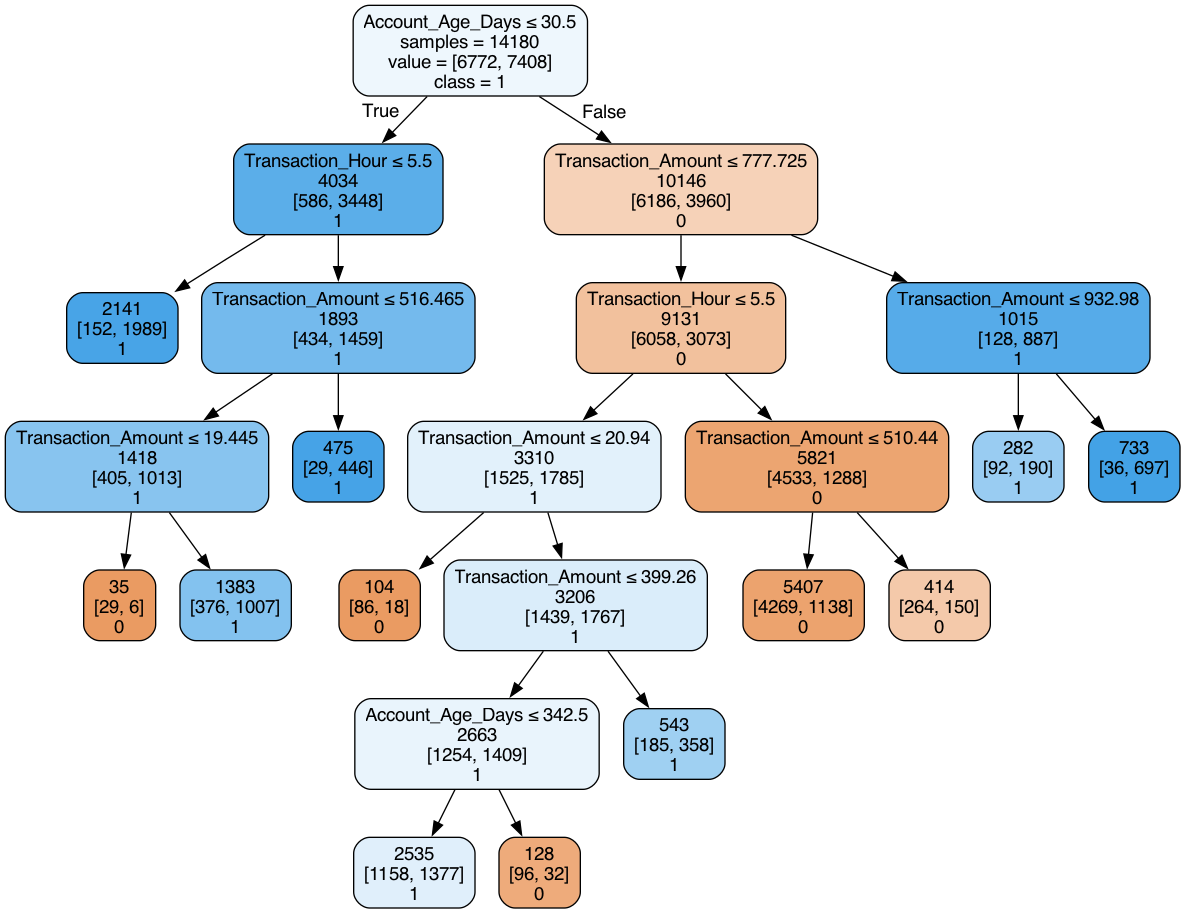

In [24]:
# Develop a classification tree using training partition.
fraud_tree = DecisionTreeClassifier(max_depth=10, 
                min_impurity_decrease=0.001, min_samples_split=30)
fraud_tree.fit(train_X, train_y)

# Display classes used in the classification tree: 'fraud' and 'legitimate'.
#print("Classes: {}".format(', '.join(fraud_tree.classes_)))
print("Classes: {}".format(', '.join(map(str, fraud_tree.classes_))))

# Use plotDecisionTree() function to visualize the classfication tree.

print()
print('Classification Tree')
plotDecisionTree(fraud_tree, feature_names=train_X.columns, class_names=fraud_tree.classes_)

In [25]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree')
classificationSummary(train_y, fraud_tree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, fraud_tree.predict(valid_X))

Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.7622)

       Prediction
Actual    0    1
     0 4744 2028
     1 1344 6064

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.7678)

       Prediction
Actual    0    1
     0 3152 1303
     1  892 4107


In [26]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(3,13)),  
    'min_impurity_decrease': [ 0,0.0005, 0.001], 
    'min_samples_split': list(range(2,30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8254
Improved parameters:  {'max_depth': 12, 'min_impurity_decrease': 0, 'min_samples_split': 4}


Best Classification Tree with Grid Search


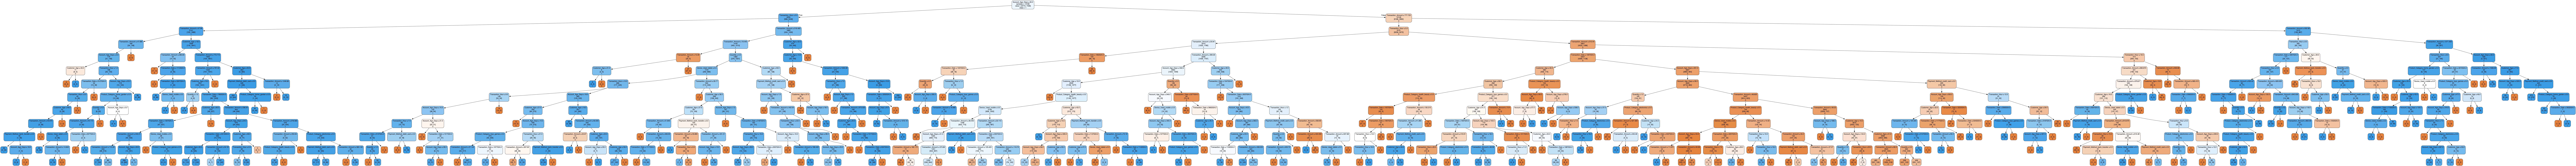

In [27]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns, class_names=fraud_tree.classes_)

In [28]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Best Classification Tree with Grid Search')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Best Classification Tree with Grid Search')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition for Best Classification Tree with Grid Search
Confusion Matrix (Accuracy 0.8590)

       Prediction
Actual    0    1
     0 5634 1138
     1  861 6547

Validation Partition for Best Classification Tree with Grid Search
Confusion Matrix (Accuracy 0.8383)

       Prediction
Actual    0    1
     0 3546  909
     1  620 4379


# Logistic Regression

In [29]:
# Display the first 10 records of fraud_df data frame.
print(fraud_df_updated.head(10))

# Identify variable types.
fraud_df_updated.dtypes

       Transaction_Amount  Transaction_Date  Quantity  Customer_Age  \
13565              599.16           1112024         5            26   
12750              171.25           3312024         4            38   
22783               82.72           3202024         5            35   
6306                24.95           2042024         3            33   
22040              333.97           2182024         4            42   
21038              405.50           3312024         3            29   
11185              299.69           4032024         1            32   
9835               177.07           2232024         1            29   
13283               67.21           3122024         2            26   
13261             1425.60           1102024         1            54   

       Is_Fraudulent  Account_Age_Days  Transaction_Hour  \
13565              0                63                 1   
12750              0               150                 1   
22783              0                69

Transaction_Amount                float64
Transaction_Date                    int64
Quantity                            int64
Customer_Age                        int64
Is_Fraudulent                       int64
Account_Age_Days                    int64
Transaction_Hour                    int64
Payment_Method_bank_transfer         bool
Payment_Method_credit_card           bool
Payment_Method_debit_card            bool
Product_Category_electronics         bool
Product_Category_health_beauty       bool
Product_Category_home_garden         bool
Product_Category_toys_games          bool
Device_Used_mobile                   bool
Device_Used_tablet                   bool
dtype: object

In [30]:
fraud_df_updated.dtypes

Transaction_Amount                float64
Transaction_Date                    int64
Quantity                            int64
Customer_Age                        int64
Is_Fraudulent                       int64
Account_Age_Days                    int64
Transaction_Hour                    int64
Payment_Method_bank_transfer         bool
Payment_Method_credit_card           bool
Payment_Method_debit_card            bool
Product_Category_electronics         bool
Product_Category_health_beauty       bool
Product_Category_home_garden         bool
Product_Category_toys_games          bool
Device_Used_mobile                   bool
Device_Used_tablet                   bool
dtype: object

In [31]:
# Create predictors X and outcome y variables.
X = fraud_df_updated.drop(columns=['Is_Fraudulent','Quantity','Transaction_Date'])
y = fraud_df_updated['Is_Fraudulent']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the fraud_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)


# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# solver='liblinear' is used for automated selection of the best parameters.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 0.645
Coefficients for Predictors
        Transaction_Amount  Customer_Age  Account_Age_Days  Transaction_Hour  \
Coeff:               0.002         0.005            -0.005            -0.077   

        Payment_Method_bank_transfer  Payment_Method_credit_card  \
Coeff:                         0.149                       0.118   

        Payment_Method_debit_card  Product_Category_electronics  \
Coeff:                      0.053                         -0.18   

        Product_Category_health_beauty  Product_Category_home_garden  \
Coeff:                          -0.012                         0.053   

        Product_Category_toys_games  Device_Used_mobile  Device_Used_tablet  
Coeff:                        0.021               0.218               0.038  


In [32]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
       Actual  Classification    p(0)    p(1)
269         1               1  0.0706  0.9294
14542       1               1  0.2065  0.7935
17703       1               1  0.4648  0.5352
9603        1               1  0.2020  0.7980
19096       0               0  0.6809  0.3191
7407        0               1  0.2078  0.7922
13817       1               0  0.6428  0.3572
975         0               0  0.6539  0.3461
19172       0               1  0.4094  0.5906
7735        0               0  0.7283  0.2717
22789       0               0  0.5742  0.4258
5577        0               1  0.4675  0.5325
630         1               0  0.7695  0.2305
7860        1               0  0.5460  0.4540
648         1               0  0.8239  0.1761
15932       1               1  0.4331  0.5669
5348        1               1  0.0236  0.9764
21462       1               1  0.1340  0.8660
7029        0               0  0.7244  0.2756
18304       0               1  0.2451  0

In [33]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.7030)

       Prediction
Actual    0    1
     0 4703 2069
     1 2142 5266

Validation Partition
Confusion Matrix (Accuracy 0.7173)

       Prediction
Actual    0    1
     0 3168 1287
     1 1386 3613


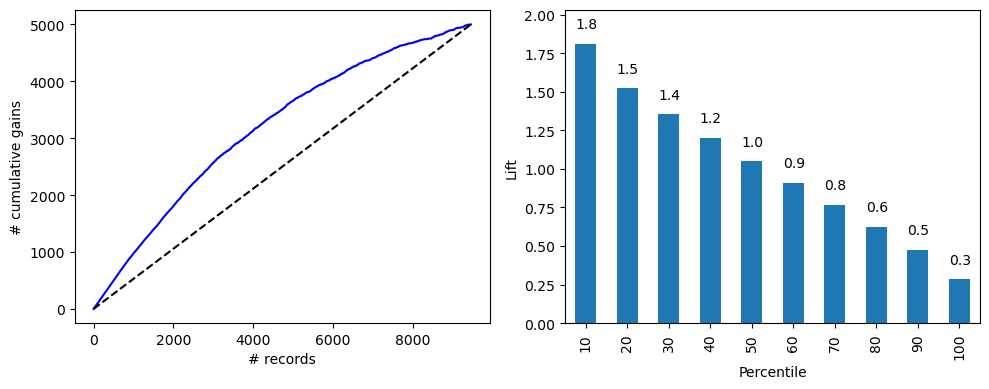

In [34]:
# Develop and display Gains chart and Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(1)'], ascending=False)

# Create a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
# In the Gains chart, the 'lift' over the base curve 
# indicates for a given number of cases (on x-axis), 
# the additional responders that you can identify 
# by using the logistic regression model.
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 1's' 
# yields 1.8 times as many 1's as would simply selecting 
# 10% of the records at random.
liftChart(df['p(1)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

In [35]:
#backward 

In [36]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(max_iter=500)
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: Transaction_Amount, Customer_Age, Account_Age_Days, Transaction_Hour, Payment_Method_bank_transfer, Payment_Method_credit_card, Payment_Method_debit_card, Product_Category_electronics, Product_Category_health_beauty, Product_Category_home_garden, Product_Category_toys_games, Device_Used_mobile, Device_Used_tablet
Start: score=22929.32
Step: score=22891.96, remove Payment_Method_debit_card
Step: score=22891.96, remove None

Best Variables from Backward Elimination Algorithm
['Transaction_Amount', 'Customer_Age', 'Account_Age_Days', 'Transaction_Hour', 'Payment_Method_bank_transfer', 'Payment_Method_credit_card', 'Product_Category_electronics', 'Product_Category_health_beauty', 'Product_Category_home_garden', 'Product_Category_toys_games', 'Device_Used_mobile', 'Device_Used_tablet']


In [37]:
# Develop the logistic regression model based
# on the Backward Elimination results.

# Identify predictors and outcome of the logistic regression model.
predictors_be = ['Transaction_Amount', 'Account_Age_Days', 'Transaction_Hour', 'Payment_Method_credit_card', 'Payment_Method_debit_card', 'Product_Category_electronics', 'Product_Category_health_beauty', 'Product_Category_home_garden', 'Product_Category_toys_games', 'Device_Used_mobile', 'Device_Used_tablet']
outcome = 'Is_Fraudulent'

# Identify X and y variables for logistic regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = fraud_df_updated[predictors_be]
y = fraud_df_updated[outcome]
train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create logistic regression model using X and y.
fraud_df_updated_be = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
fraud_df_updated_be.fit(train_X_be, train_y_be)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(fraud_df_updated_be.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(fraud_df_updated_be.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 1.088
Coefficients for Predictors
        Transaction_Amount  Account_Age_Days  Transaction_Hour  \
Coeff:               0.002            -0.005            -0.078   

        Payment_Method_credit_card  Payment_Method_debit_card  \
Coeff:                       0.014                     -0.066   

        Product_Category_electronics  Product_Category_health_beauty  \
Coeff:                        -0.313                          -0.136   

        Product_Category_home_garden  Product_Category_toys_games  \
Coeff:                        -0.072                       -0.109   

        Device_Used_mobile  Device_Used_tablet  
Coeff:               0.178              -0.027  


In [38]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Logistic Model Based On Backward Elimination')
classificationSummary(train_y_be, fraud_df_updated_be.predict(train_X_be))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Logistic Model Based On Backward Elimination')
classificationSummary(valid_y_be, fraud_df_updated_be.predict(valid_X_be))

Training Partition for Logistic Model Based On Backward Elimination
Confusion Matrix (Accuracy 0.7015)

       Prediction
Actual    0    1
     0 4705 2067
     1 2166 5242

Validation Partition for Logistic Model Based On Backward Elimination
Confusion Matrix (Accuracy 0.7159)

       Prediction
Actual    0    1
     0 3181 1274
     1 1412 3587


In [39]:
#Graphs for traning and validation accuracy for all models

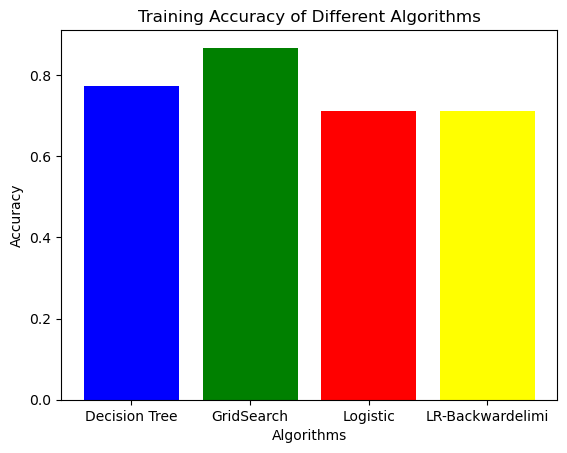

In [40]:


# (accuracy scores for different algorithms)
algorithms = ['Decision Tree', 'GridSearch','Logistic','LR-Backwardelimi']
accuracy_scores = [0.7723, 0.8672,0.7123,0.7123]

# Creating a bar plot
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'red','Yellow','Pink'])

# Add titles and labels
plt.title('Training Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

# Displaying the plot
plt.show()


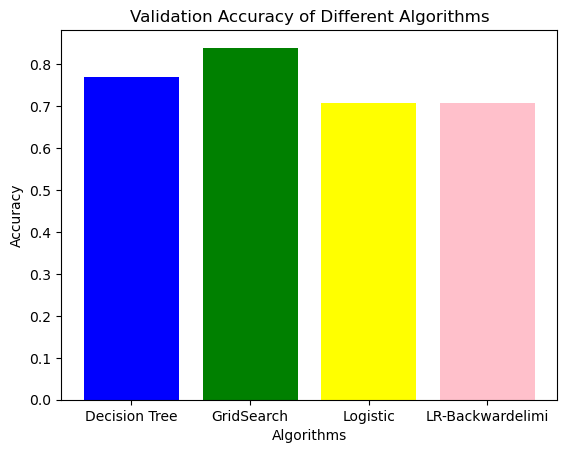

In [41]:

# (accuracy scores for different algorithms)
algorithms = ['Decision Tree', 'GridSearch','Logistic','LR-Backwardelimi']
accuracy_scores = [0.7712, 0.8400,0.7080,0.7072]

# Creating a bar plot
plt.bar(algorithms, accuracy_scores, color=['blue', 'green','Yellow','Pink'])

# Add titles and labels
plt.title('Validation Accuracy of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

# Displaying the plot
plt.show()